# Import relevant libraries

In [1]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa

# Load the Data

In [3]:
npz = np.load('/content/drive/MyDrive/Colab Notebooks/house_prices_predictor/house_price_data_train.npz')
train_inputs = npz['inputs'].astype('float')
train_targets = npz['targets'].astype('int')
train_data = npz

npz = np.load('/content/drive/MyDrive/Colab Notebooks/house_prices_predictor/house_price_data_validation.npz')
validation_inputs = npz['inputs'].astype('float')
validation_targets =npz['targets'].astype('int')

npz = np.load('/content/drive/MyDrive/Colab Notebooks/house_prices_predictor/house_price_data_test.npz')
test_inputs = npz['inputs'].astype('float')
test_targets =npz['targets'].astype('int')

In [4]:
print(f'Train count: {train_inputs.shape}\n')
print(f'Validation count: {validation_inputs.shape}\n')
print(f'Test count: {test_inputs.shape}\n')

Train count: (1081, 131)

Validation count: (135, 131)

Test count: (136, 131)



# Create the model

In [30]:
input_size = train_inputs.shape[1]
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_size,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(output_size)
])

optimizer_learning_rate = 0.01
# manually set the initial learning rate, thus customizing the optimizer
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=optimizer_learning_rate) 

model.compile(optimizer=custom_optimizer, loss='mae',metrics=[tfa.metrics.RSquare()])

# Train the Model

In [31]:
BATCH_SIZE = 64
MAX_EPOCHS = 200
PATIENCE = 20

# early stopping is function used to stop the model training before it overfits
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=PATIENCE
)
 
history = model.fit(
    train_inputs, 
    train_targets, 
    batch_size=BATCH_SIZE,
    epochs=MAX_EPOCHS,
    callbacks=[early_stopping],
    validation_data=(validation_inputs,validation_targets),
    verbose=2
)

Epoch 1/200
17/17 - 2s - loss: 171964.9531 - r_square: -8.4992e+00 - val_loss: 167755.9688 - val_r_square: -8.3369e+00 - 2s/epoch - 93ms/step
Epoch 2/200
17/17 - 0s - loss: 171481.8438 - r_square: -8.4523e+00 - val_loss: 166197.6094 - val_r_square: -8.1851e+00 - 101ms/epoch - 6ms/step
Epoch 3/200
17/17 - 0s - loss: 166446.8438 - r_square: -7.9701e+00 - val_loss: 154498.4219 - val_r_square: -7.0968e+00 - 101ms/epoch - 6ms/step
Epoch 4/200
17/17 - 0s - loss: 140510.0938 - r_square: -5.7689e+00 - val_loss: 107167.4453 - val_r_square: -3.4108e+00 - 88ms/epoch - 5ms/step
Epoch 5/200
17/17 - 0s - loss: 69294.8516 - r_square: -1.3193e+00 - val_loss: 39541.6289 - val_r_square: 0.2609 - 94ms/epoch - 6ms/step
Epoch 6/200
17/17 - 0s - loss: 29092.4785 - r_square: 0.5934 - val_loss: 25339.4551 - val_r_square: 0.6560 - 102ms/epoch - 6ms/step
Epoch 7/200
17/17 - 0s - loss: 20607.0703 - r_square: 0.7604 - val_loss: 20080.8574 - val_r_square: 0.7782 - 92ms/epoch - 5ms/step
Epoch 8/200
17/17 - 0s - los

From the training I obtained a train accuracy of 88.30% and a validation accuracy of 92.16%

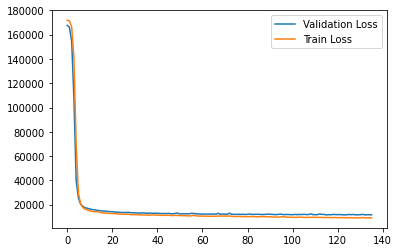

In [39]:
import matplotlib.pyplot as plt
#Plotting the Validation loss and train loss
plt.plot(history.epoch, history.history['val_loss'], label="Validation Loss")
plt.plot(history.epoch, history.history['loss'], label="Train Loss")
plt.legend()

# Test the model

In [40]:
test_loss, test_occuracy = model.evaluate(test_inputs, test_targets)
print('Test loss: {0:.2f} - Test accuracy: {1:.2f}%'.format(test_loss,test_occuracy*100))

5/5 [==============================] - 0s 4ms/step - loss: 13465.8760 - r_square: 0.8768
Test loss: 13465.88 - Test accuracy: 87.68%


* train accuracy: 88.30% 
* Validation accuracy: 92.16%
* Test accuracy: 87.68%

From the results obtained, the model is good.


# Comments

From this project, I learned that a good model doesn't depend only on the hyperparameter tunning, the perfomance on trainning depends even more on the quality of the data, that is the result of the cleaning.

This data is from a competition on kaggle, but I won't use the test data given on the site because I'll not submit the results any results on the competition for now.

The original idea was to collect data about houses from Mozambique and then work on the collected data, but the data sources were not satisfactory so I could only use the data available on kaggle.